**Credit card frauds**

This dataset is unbalanced which means using the data as it is might result in unwanted behaviour from a supervised classifier. To make it easy to understand if a classifier were to train with this data set trying to achieve the best accuracy possible it would most likely label every transaction as a non-fraud

In [2]:
#https://www.kaggle.com/code/pierra/credit-card-dataset-svm-classification/inputi
import pandas as pd
df = pd.read_csv(r'/content/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

In [4]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df['Class'].value_counts()

,count
Class,
0,284315
1,492


In [7]:
number_no_fraud = df[df.Class==0]
number_fraud = df[df.Class==1]

In [8]:
print('There are only '+ str(len(number_fraud)) + ' frauds in the original dataset, even though there are ' + str(len(number_no_fraud)) +' no frauds in the dataset.')

There are only 492 frauds in the original dataset, even though there are 284315 no frauds in the dataset.


(0.0, 2500.0)

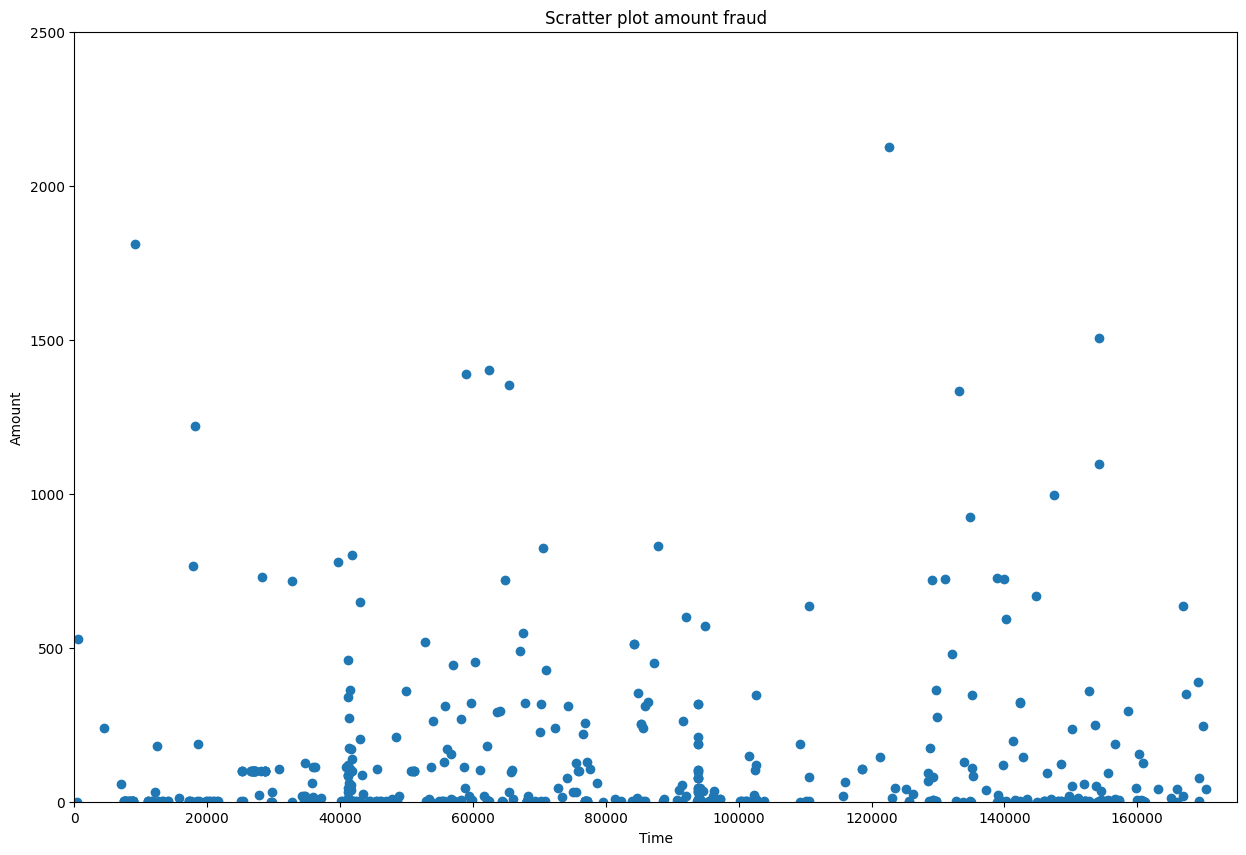

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(number_fraud['Time'], number_fraud['Amount']) # Display fraud amounts according to their time
plt.title('Scratter plot amount fraud')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.xlim([0,175000])
plt.ylim([0,2500])

In [10]:
print(number_no_fraud.shape)
print(number_fraud.shape)

(284315, 31)
(492, 31)


In [11]:
number_no_fraud.Amount.describe()

,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


In [12]:
number_fraud.Amount.describe()

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


Correlation of features

In [13]:
df_corr = df.corr()

Text(0.5, 1.0, 'Heatmap correlation')

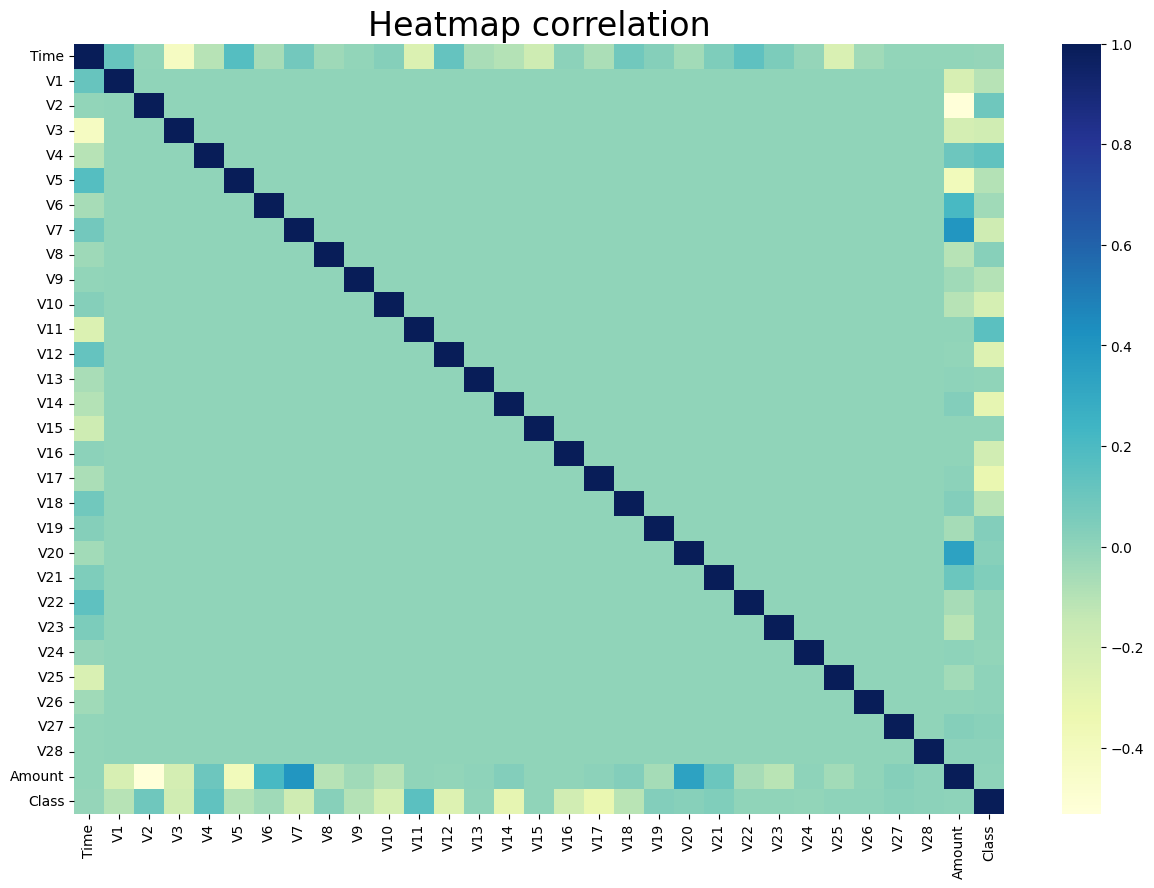

In [14]:
import seaborn
plt.figure(figsize=(15,10))
seaborn.heatmap(df_corr, cmap="YlGnBu")
seaborn.set(font_scale=2,style='white')

plt.title('Heatmap correlation')

In [15]:
#Compare Values for both Transaction
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [16]:

#Fraud Transaction are 492
#We will choose 492 random Transaction from legit transaction and join in legit data
#This makes a uniformly distributed dataset which is good for modelling
Legit_sample = number_no_fraud.sample(n=492)

In [17]:
newdf = pd.concat([Legit_sample,number_fraud],axis=0)

In [18]:
newdf.tail(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [19]:
newdf['Class'].value_counts()

,count
Class,
0,492
1,492


In [20]:
#Compare Values for both Transaction
newdf.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94592.310976,0.088942,-0.015664,-0.031896,-0.013653,-0.000391,-0.005964,-0.019746,0.100415,0.036595,...,-0.032498,-0.023780,-0.005269,0.016524,0.033136,0.035136,0.002731,-0.010549,0.017352,82.014329
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [21]:
x = newdf.drop('Class',axis=1)
y = newdf['Class']

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)

In [23]:
print(x.shape , x_train.shape , x_test.shape)

(984, 30) (787, 30) (197, 30)


In [24]:
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression(max_iter=1000)#max_iter=1000
model_log.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [25]:
y_pred_log_test = model_log.predict(x_test)
y_pred_log_test[:5]

array([1, 1, 0, 1, 0])

In [26]:
y_pred_log_train = model_log.predict(x_train)
y_pred_log_train[:5]

array([0, 0, 0, 1, 1])

In [27]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
cms = confusion_matrix(y_test,y_pred_log_test)
print(cms)
print("Accuracy on Training Data : " , accuracy_score(y_train,y_pred_log_train))
print("Accuracy on Testing Data : " , accuracy_score(y_test,y_pred_log_test))


[[98  1]
 [ 5 93]]
Accuracy on Training Data :  0.9415501905972046
Accuracy on Testing Data :  0.9695431472081218


In [28]:
print('We have detected ' + str(cms[1][1]) + ' frauds / ' + str(cms[1][1]+cms[1][0]) + ' total frauds.')
print("So, the probability to detect a fraud is " ,accuracy_score(y_train,y_pred_log_train))
print("the accuracy is : ",accuracy_score(y_test,y_pred_log_test))

We have detected 93 frauds / 98 total frauds.
So, the probability to detect a fraud is  0.9415501905972046
the accuracy is :  0.9695431472081218


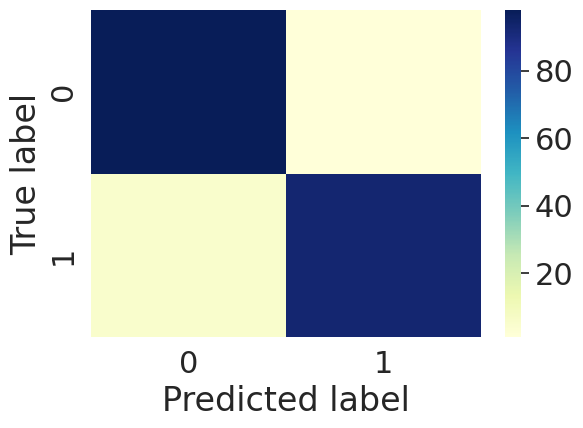

In [29]:
import seaborn as sns
sns.heatmap(cms, cmap="YlGnBu")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

In [30]:
X = df.drop('Class', axis=1)
Y = df['Class']

In [31]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_res, y_res = sm.fit_resample(X, Y)

In [32]:
X_trains, X_tests, Y_trains, Y_tests = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier

model_dtc = DecisionTreeClassifier(max_depth=5)
model_dtc.fit(X_trains, Y_trains)
y_pred_dtc = model_dtc.predict(X_tests)

print("Decision Tree Report:\n", classification_report(Y_tests, y_pred_dtc))
cm_dtc = confusion_matrix(Y_tests,y_pred_dtc)
print(cm_dtc)


Decision Tree Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     85149
           1       0.98      0.96      0.97     85440

    accuracy                           0.97    170589
   macro avg       0.97      0.97      0.97    170589
weighted avg       0.97      0.97      0.97    170589

[[83504  1645]
 [ 3358 82082]]


In [56]:
print('We have detected ' + str(cm_dtc[1][1]) + ' frauds / ' + str(cm_dtc[1][1]+cm_dtc[1][0]) + ' total frauds.')
print("the accuracy is : ",accuracy_score(Y_tests,y_pred_dtc))

We have detected 82082 frauds / 85440 total frauds.
the accuracy is :  0.9706722004349636


K-Nearest Neighbors (KNN)

In [58]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_trains, Y_trains)
y_pred_knn = model_knn.predict(X_tests)

print("KNN Report:\n", classification_report(Y_tests, y_pred_knn))
cm_knn = confusion_matrix(Y_tests,y_pred_knn)
print(cm_knn)

KNN Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96     85149
           1       0.95      0.97      0.96     85440

    accuracy                           0.96    170589
   macro avg       0.96      0.96      0.96    170589
weighted avg       0.96      0.96      0.96    170589

[[80476  4673]
 [ 2156 83284]]


In [59]:
print('We have detected ' + str(cm_knn[1][1]) + ' frauds / ' + str(cm_knn[1][1]+cm_knn[1][0]) + ' total frauds.')
print("the accuracy is : ",accuracy_score(Y_tests,y_pred_knn))

We have detected 83284 frauds / 85440 total frauds.
the accuracy is :  0.9599681104877805


SVM model apply

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_trains = scaler.fit_transform(X_trains)
X_tests = scaler.transform(X_tests)

In [61]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_trains, Y_trains)

SVC()

In [62]:
y_pred = model.predict(x_test)
y_pred[:5]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


array([0, 0, 0, 0, 0])

In [63]:
from sklearn.metrics import accuracy_score,confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)
print("Accuracy on Training Data for LogisticRegression : " , accuracy_score(y_train,y_pred_log_train))
accuracy_score(y_test,y_pred)

[[99  0]
 [98  0]]
Accuracy on Training Data for LogisticRegression :  0.9415501905972046


0.5025380710659898

In [64]:
print('We have detected ' + str(cm[1][1]) + ' frauds / ' + str(cm[1][1]+cm[1][0]) + ' total frauds.')

We have detected 0 frauds / 98 total frauds.


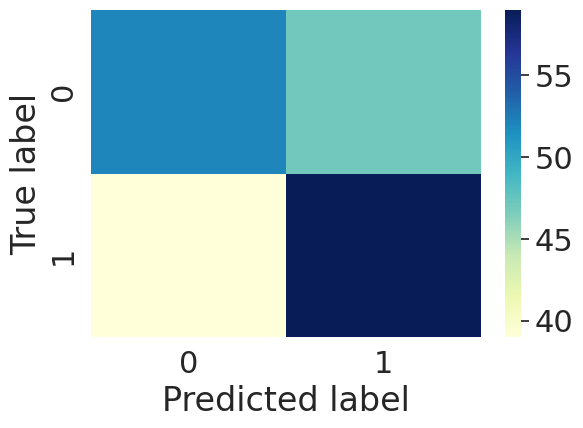

In [41]:
import seaborn as sns
sns.heatmap(cm, cmap="YlGnBu")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

In [42]:
model1 = SVC(kernel="poly")
model1.fit(x_train,y_train)

SVC(kernel='poly')

In [43]:
y_pred_poly = model1.predict(x_test)
cm_p = confusion_matrix(y_test,y_pred_poly)
print(cm_p)
accuracy_score(y_test,y_pred_poly)

[[36 63]
 [27 71]]


0.5431472081218274

In [44]:
print('We have detected ' + str(cm_p[1][1]) + ' frauds / ' + str(cm_p[1][1]+cm_p[1][0]) + ' total frauds.')

We have detected 71 frauds / 98 total frauds.


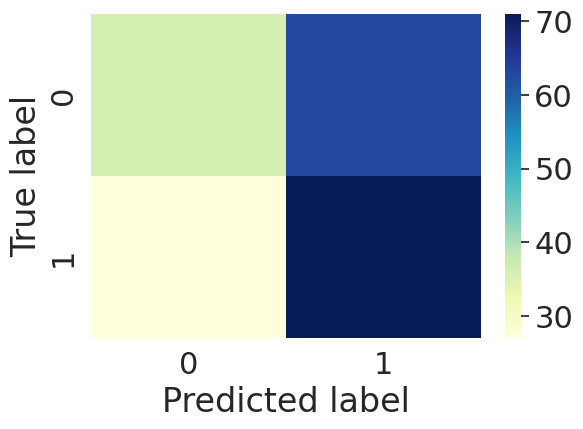

In [45]:
sns.heatmap(cm_p, cmap="YlGnBu")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

In [46]:
# svm_model = SVC(kernel="linear")
# svm_model.fit(x_train, y_train)

In [47]:
# y_pred_linear = svm_model.predict(x_test)
# accuracy_score(y_test, y_pred_linear)

In [48]:
svm_model1 = SVC(kernel="rbf", C=100)
svm_model1.fit(x_train, y_train)

SVC(C=100)

In [49]:
y_pred_rbf = svm_model1.predict(x_test)
cm_rbf = confusion_matrix(y_test,y_pred_rbf)
print(cm_rbf)
accuracy_score(y_test, y_pred_rbf)

[[51 48]
 [32 66]]


0.5939086294416244

In [50]:
print('We have detected ' + str(cm_rbf[1][1]) + ' frauds / ' + str(cm_rbf[1][1]+cm_rbf[1][0]) + ' total frauds.')

We have detected 66 frauds / 98 total frauds.


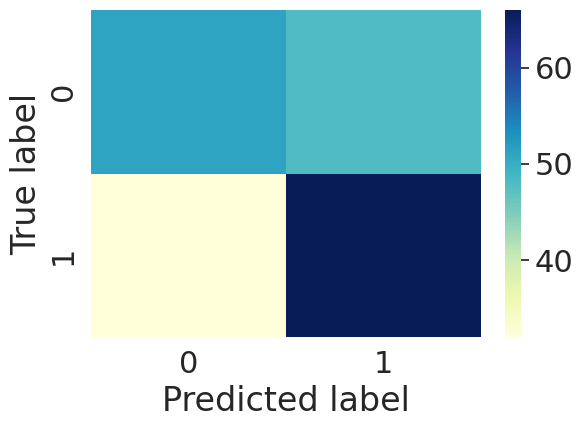

In [51]:
sns.heatmap(cm_rbf, cmap="YlGnBu")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

In [52]:
svm_model2 = SVC(kernel="sigmoid", C=100)
svm_model2.fit(x_train, y_train)

SVC(C=100, kernel='sigmoid')

In [53]:
y_pred_sigmoid = svm_model2.predict(x_test)
cm_sig = confusion_matrix(y_test,y_pred_sigmoid)
print(cm_sig)
accuracy_score(y_test, y_pred_sigmoid)

[[57 42]
 [50 48]]


0.5329949238578681

In [54]:
print('We have detected ' + str(cm_sig[1][1]) + ' frauds / ' + str(cm_sig[1][1]+cm_sig[1][0]) + ' total frauds.')

We have detected 48 frauds / 98 total frauds.


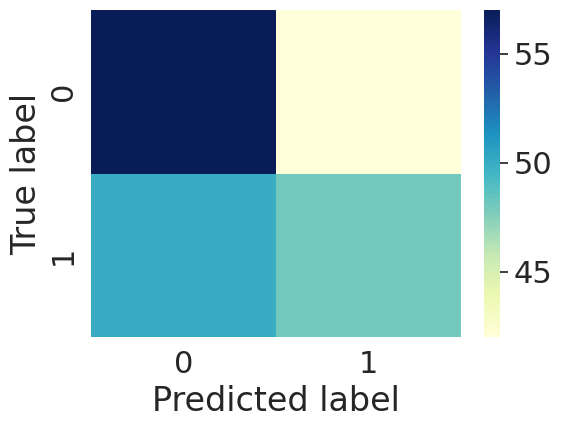

In [55]:
sns.heatmap(cm_sig, cmap="YlGnBu")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

Overall Final Status:-

**LogisticRegression:**
- We have detected 93 frauds / 98 total frauds.
- So, the probability to detect a fraud is  0.9479034307496823
- the accuracy is :  0.9695431472081218

**Decision Tree**

- We have detected 82082 frauds / 85440 total frauds.
- the accuracy is :  0.9706722004349636

**K-Nearest Neighbors (KNN)**

- We have detected 83284 frauds / 85440 total frauds.
- the accuracy is :  0.9599681104877805

**SVC**

- We have detected 0 frauds / 98 total frauds.
- Accuracy : 0.5025380710659898

**SVM in poly**

- We have detected 71 frauds / 98 total frauds.
- Accuracy : 0.5126903553299492

**SVM in rbf**

- We have detected 27 frauds / 98 total frauds.
- Accuracy : 0.5279187817258884

**SVM in sigmoid**

- We have detected 45 frauds / 98 total frauds.
- Accuracy : 0.49238578680203043